# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/combined_data/combined_data.csv")
df.head()

,AvgTemp,MaxTemp,MinTemp,SeaLevelPressure,AvgHumidity,TotalRainfallSnowmelt,AvgVisibility,AvgWindSpeed,MaxWindSpeed,RainDrizzle,Snow,ThunderStorm,Fog,PM 2.5
0,4.3,10.0,1.7,1023.1,94.0,0.00,8.0,13.0,22.2,0.0,0.0,0.0,0.0,40.080000
1,8.8,14.4,1.7,1021.4,89.0,0.00,10.3,8.9,20.6,0.0,0.0,0.0,0.0,42.400000
2,14.3,17.2,5.0,1016.6,84.0,0.76,12.4,15.2,24.1,0.0,0.0,0.0,0.0,31.250000
3,5.8,9.4,-2.2,1023.8,70.0,0.00,15.6,17.0,38.9,0.0,0.0,0.0,0.0,20.227273
4,2.1,4.0,-1.0,1025.9,49.0,0.00,16.1,20.9,29.4,0.0,0.0,0.0,0.0,17.100000


In [4]:
# split into dependent and independent features
X = df.iloc[:,:-1] # independent features
y = df.iloc[:,-1]  # dependent feature

In [5]:
X.shape, y.shape

((3874, 13), (3874,))

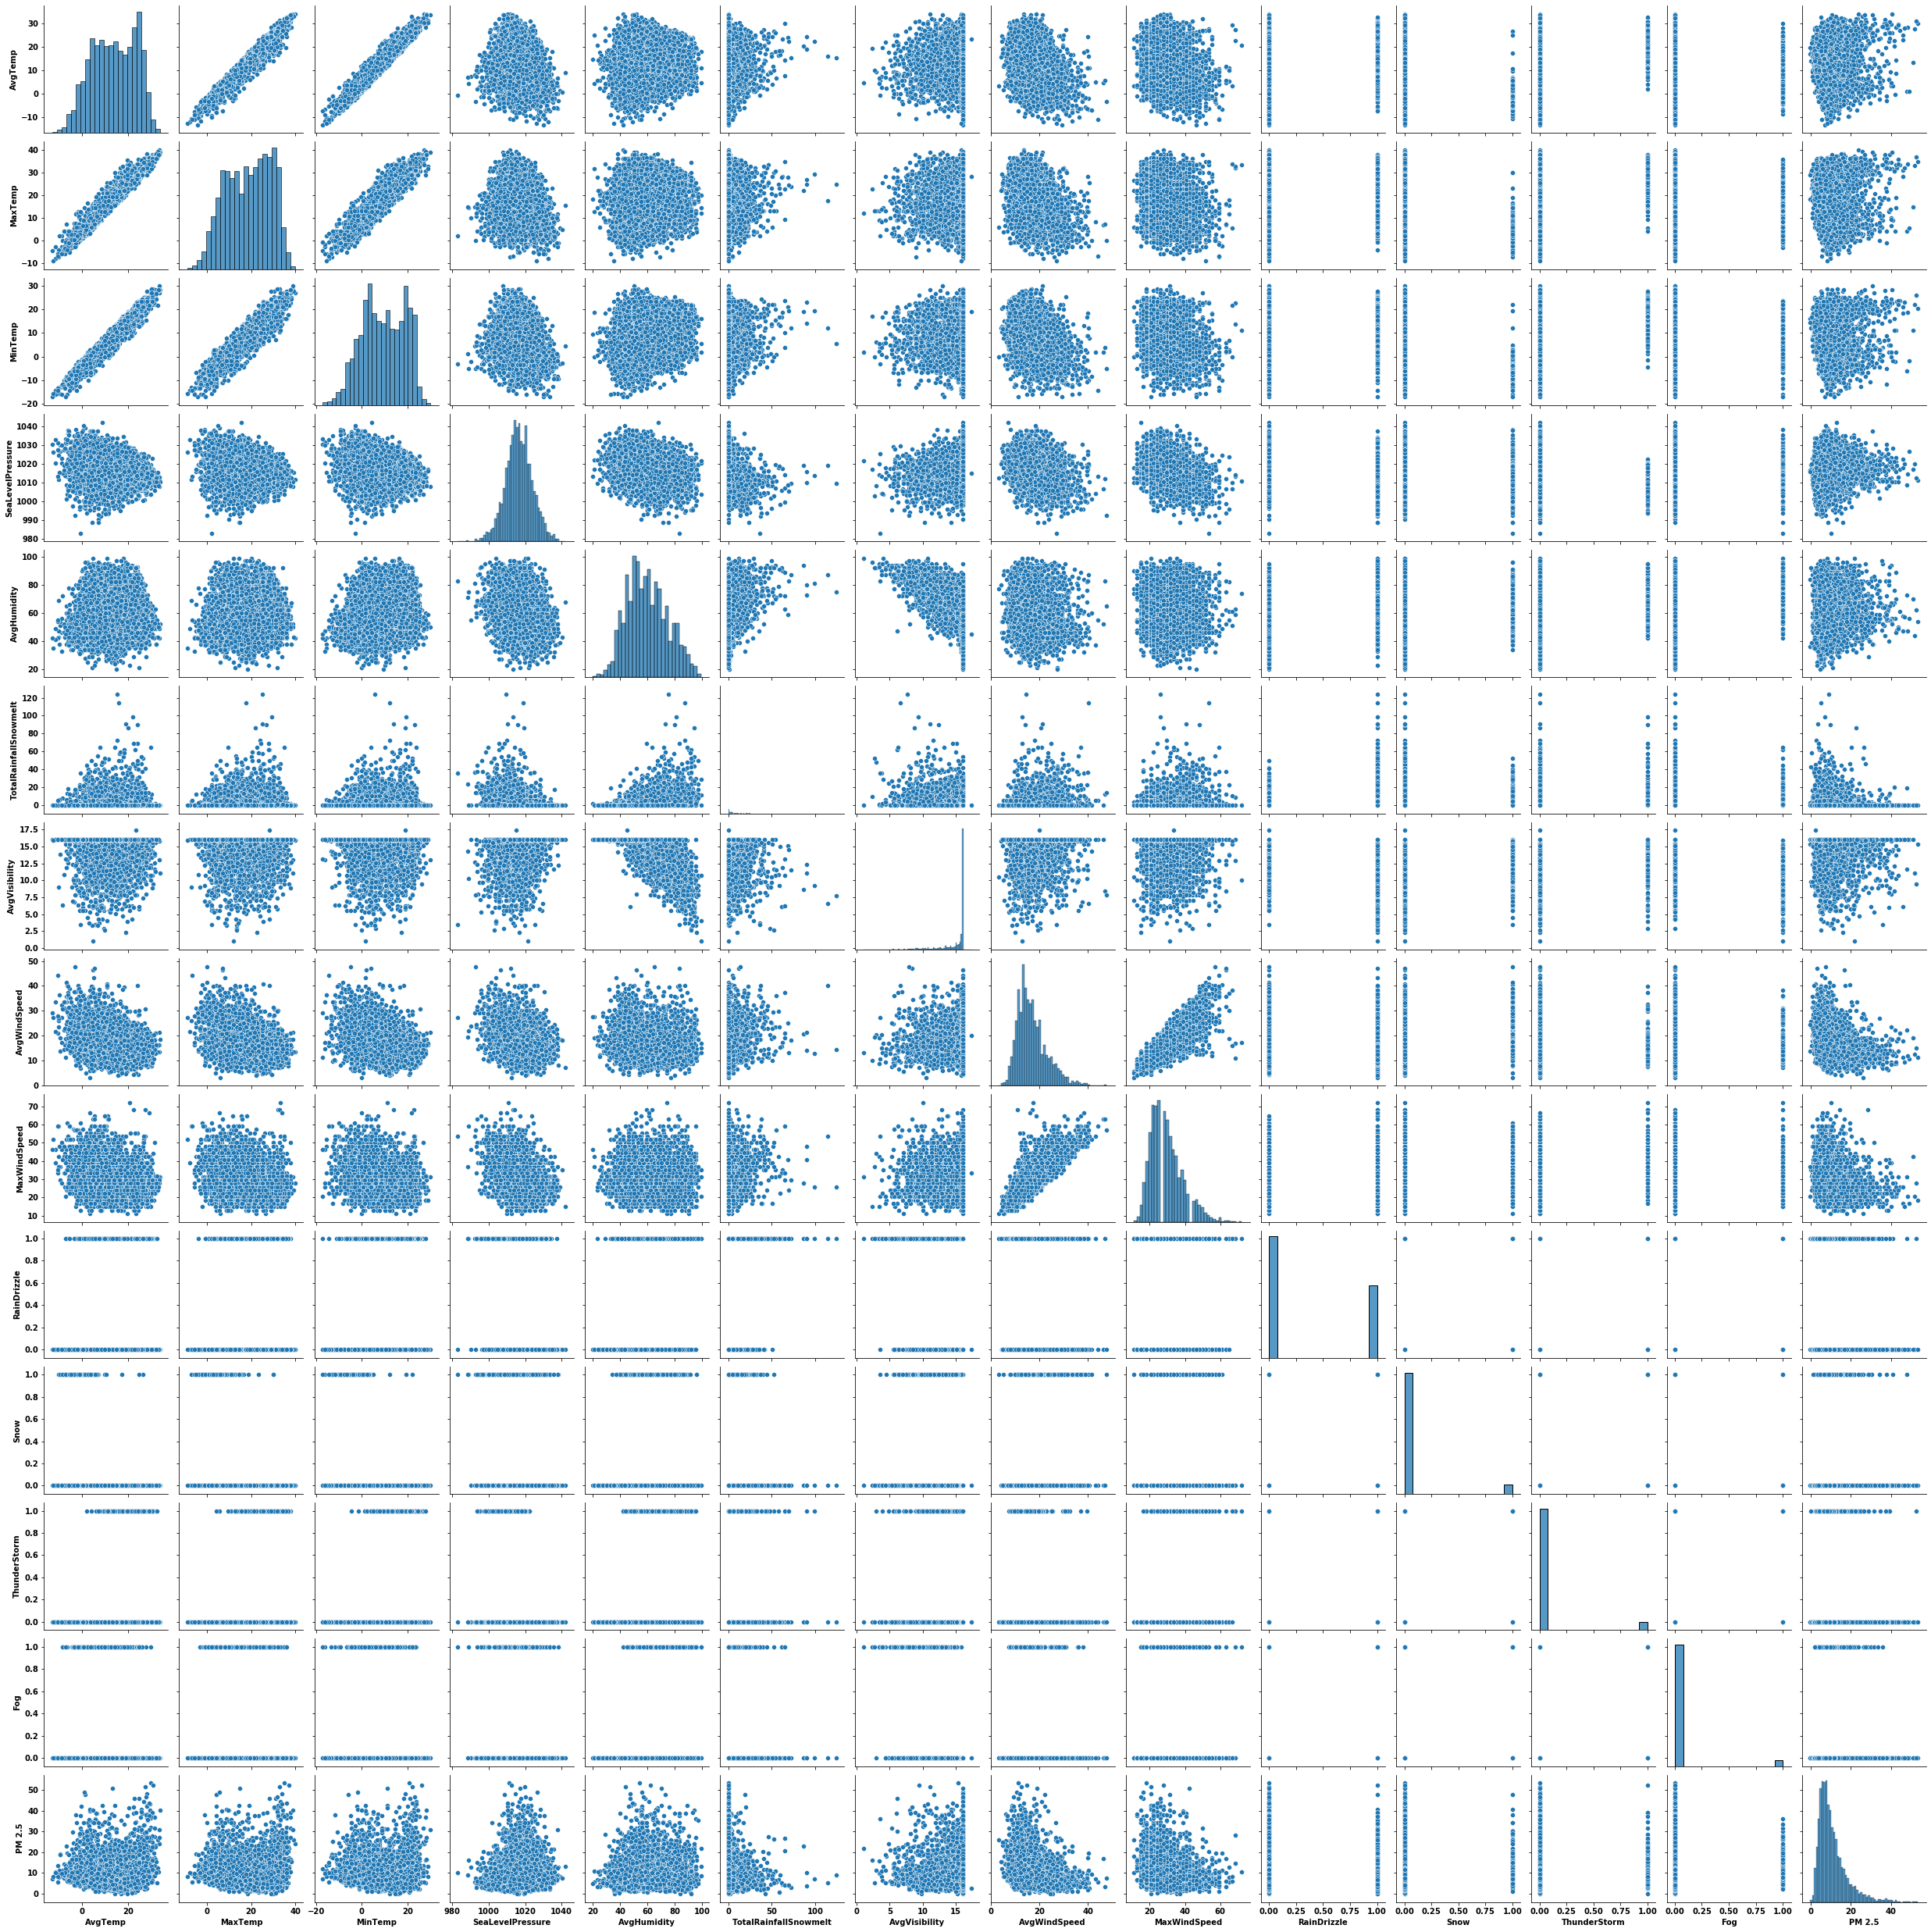

In [6]:
# multivariate analisys to compare the features and see if there is correlation
sns.pairplot(df)

there is no linear dependence between target and features, we will still apply linear regression to see the base line

In [7]:
df.corr()

,AvgTemp,MaxTemp,MinTemp,SeaLevelPressure,AvgHumidity,TotalRainfallSnowmelt,AvgVisibility,AvgWindSpeed,MaxWindSpeed,RainDrizzle,Snow,ThunderStorm,Fog,PM 2.5
AvgTemp,1.000000,0.976301,0.977303,-0.187835,0.136149,0.009020,0.070579,-0.391066,-0.294106,0.075839,-0.373613,0.230183,-0.093461,0.030955
MaxTemp,0.976301,1.000000,0.944566,-0.174923,0.091607,0.003636,0.081241,-0.366004,-0.264643,0.069127,-0.378466,0.238107,-0.087336,0.021180
MinTemp,0.977303,0.944566,1.000000,-0.186818,0.183616,0.025471,0.054077,-0.361028,-0.291037,0.094269,-0.361090,0.231699,-0.090079,-0.010012
SeaLevelPressure,-0.187835,-0.174923,-0.186818,1.000000,-0.209142,-0.266815,0.219231,-0.244726,-0.324823,-0.289556,-0.097465,-0.172940,-0.095437,0.052067
AvgHumidity,0.136149,0.091607,0.183616,-0.209142,1.000000,0.347910,-0.642387,-0.107494,-0.058689,0.544274,0.066489,0.164200,0.236090,0.056593
TotalRainfallSnowmelt,0.009020,0.003636,0.025471,-0.266815,0.347910,1.000000,-0.375058,0.180179,0.221387,0.353500,0.069439,0.184485,0.088853,-0.089738
AvgVisibility,0.070579,0.081241,0.054077,0.219231,-0.642387,-0.375058,1.000000,-0.027601,-0.096327,-0.436619,-0.239044,-0.120529,-0.500090,-0.132029
AvgWindSpeed,-0.391066,-0.366004,-0.361028,-0.244726,-0.107494,0.180179,-0.027601,1.000000,0.808143,0.053195,0.193846,-0.045357,0.006479,-0.265771
MaxWindSpeed,-0.294106,-0.264643,-0.291037,-0.324823,-0.058689,0.221387,-0.096327,0.808143,1.000000,0.154771,0.195170,0.101863,0.065795,-0.209960
RainDrizzle,0.075839,0.069127,0.094269,-0.289556,0.544274,0.353500,-0.436619,0.053195,0.154771,1.000000,0.045658,0.317190,0.125492,-0.093103


#### Correlation with seaborn

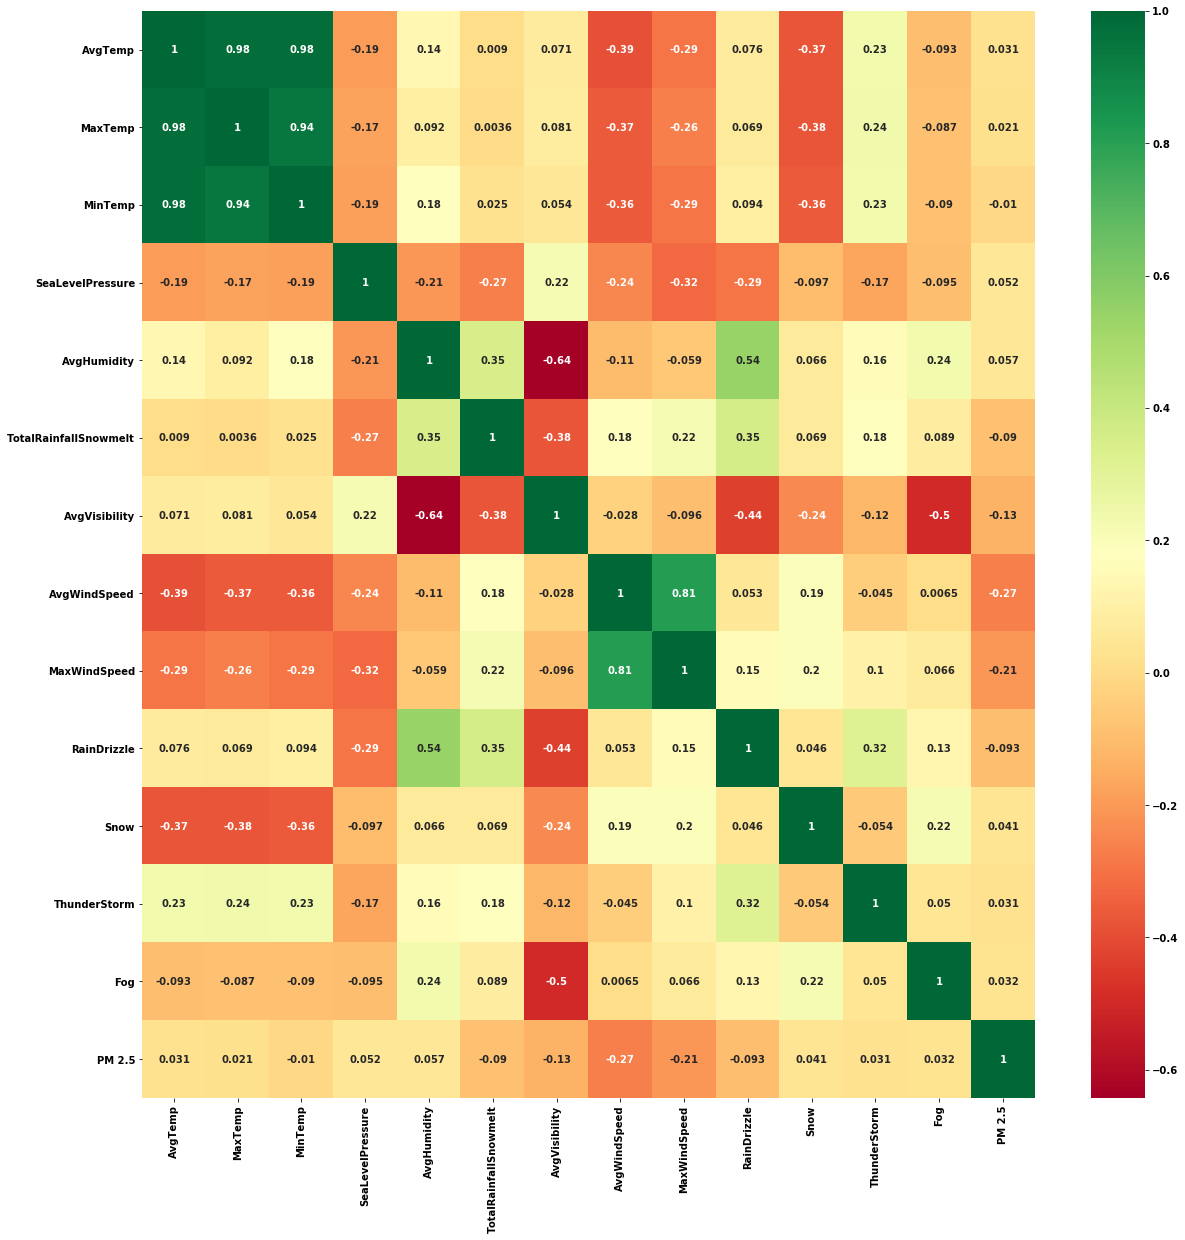

In [10]:
correlation = df.corr()
top_corr_features = correlation.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [9]:
top_corr_features

Index(['AvgTemp', 'MaxTemp', 'MinTemp', 'SeaLevelPressure', 'AvgHumidity',
       'TotalRainfallSnowmelt', 'AvgVisibility', 'AvgWindSpeed',
       'MaxWindSpeed', 'RainDrizzle', 'Snow', 'ThunderStorm', 'Fog', 'PM 2.5'],
      dtype='object')

#### Feature Importance

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [11]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [12]:
print(model.feature_importances_)

[0.12136976 0.1151843  0.11557907 0.08717198 0.08778143 0.04431664
 0.11480587 0.14560343 0.09475042 0.04600957 0.00807247 0.0092033
 0.01015175]


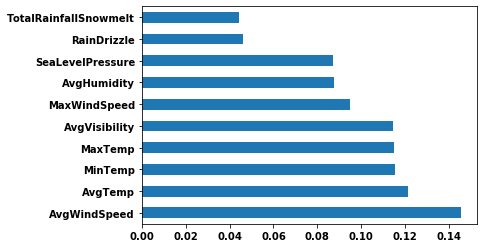

In [14]:
# plot the graph of feature importances

feature_importances = pd.Series(model.feature_importances_, index = X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

c:\users\tigju\anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


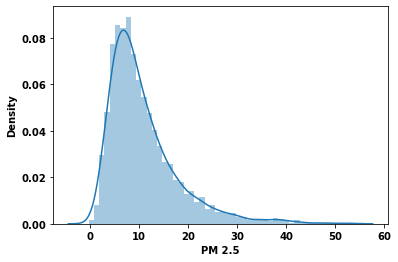

In [19]:
sns.distplot(y)

#### Train test split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
# coefficient values (slope values) y=mx+c
lr.coef_

array([ 0.78753718, -0.14437277, -0.69027512, -0.00925113,  0.00520344,
       -0.06814227, -0.82333347, -0.24454727, -0.03479935, -2.63517061,
        1.32449105,  2.65323028, -3.2026978 ])

In [34]:
# intercept, the target value where all the independent features are 0
lr.intercept_

36.91469887955698

In [28]:
print(f"Coefficient of Determination R^2 on train set: {lr.score(X_train,y_train)}")

Coefficient of Determination R^2 on train set: 0.16177379215681964


In [29]:
print(f"Coefficient of Determination R^2 on test set: {lr.score(X_test,y_test)}")

Coefficient of Determination R^2 on test set: 0.16223708476568466


In [31]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr, X, y, cv=5)

In [32]:
score.mean()

-0.4058975065957549

R^2 even worse than horizontal line

#### Model Evaluation

In [35]:
coef_df = pd.DataFrame(lr.coef_,X.columns, columns=['Coefficient'])
coef_df

,Coefficient
AvgTemp,0.787537
MaxTemp,-0.144373
MinTemp,-0.690275
SeaLevelPressure,-0.009251
AvgHumidity,0.005203
TotalRainfallSnowmelt,-0.068142
AvgVisibility,-0.823333
AvgWindSpeed,-0.244547
MaxWindSpeed,-0.034799
RainDrizzle,-2.635171


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **AvgTemp** is associated with an **increase** of 0.787537 in AQI **PM2.5** 
- Holding all other features fixed, a 1 unit increase in **MaxTemp** is associated with an **decrease** of 0.144373 in AQI **PM2.5** 
- Holding all other features fixed, a 1 unit increase in **MinTemp** is associated with an **decrease** of 0.690275 in AQI **PM2.5**
- Holding all other features fixed, a 1 unit increase in **SeaLevelPressure** is associated with an **decrease** of 0.009251 in AQI **PM2.5** 
- Holding all other features fixed, a 1 unit increase in **AvgHumidity** is associated with an **increase** of 0.005203 in AQI **PM2.5** 
- Holding all other features fixed, a 1 unit increase in **TotalRainfallSnowmelt** is associated with an **decrease** of 0.068142 in AQI **PM2.5**
- Holding all other features fixed, a 1 unit increase in **AvgVisibility** is associated with an **decrease** of 0.823333 in AQI **PM2.5**
- Holding all other features fixed, a 1 unit increase in **AvgWindSpeed** is associated with an **decrease** of 0.244547 in AQI **PM2.5**
- Holding all other features fixed, a 1 unit increase in **MaxWindSpeed** is associated with an **decrease** of 0.034799 in AQI **PM2.5**
- Holding all other features fixed, a 1 unit increase in **RainDrizzle** is associated with an **decrease** of 2.635171 in AQI **PM2.5**
- Holding all other features fixed, a 1 unit increase in **Snow** is associated with an **increase** of 1.324491 in AQI **PM2.5** 
- Holding all other features fixed, a 1 unit increase in **ThunderStorm** is associated with an **increase** of 2.653230 in AQI **PM2.5** 
- Holding all other features fixed, a 1 unit increase in **Fog** is associated with an **decrease** of 3.202698 in AQI **PM2.5**

In [36]:
prediction = lr.predict(X_test)

c:\users\tigju\anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


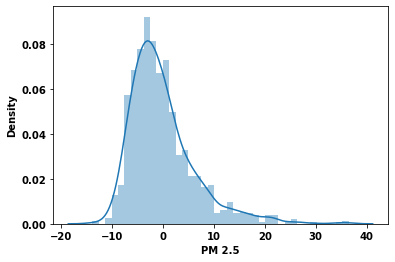

In [37]:
sns.distplot(y_test-prediction)

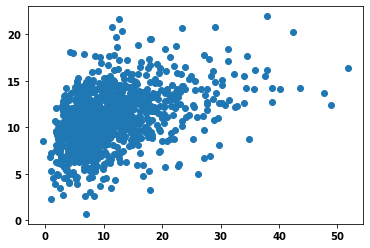

In [38]:
plt.scatter(y_test, prediction)

### Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

$$\large\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error (MSE)** is the mean of the squared errors:

$$\large\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

$$\large\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

#### Comparing these metrics:

**MAE** is the easiest to understand, because it's the average error.

**MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.

**RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.

In [39]:
from sklearn import metrics

In [41]:
print("MAE: ", metrics.mean_absolute_error(y_test, prediction))
print("MSE: ", metrics.mean_squared_error(y_test, prediction))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE:  4.751907987029813
MSE:  41.55548437845026
RMSE:  6.446354347881464


In [45]:
# we need to pickle the model for deployment on heroku
import pickle

In [44]:
# open file where you want to store the data
file = open("linear_regression_model.pkl", "wb")

# dump information to that file
pickle.dump(lr, file)